**Varad Nerlekar**

**18070123085**

*Assignment 1*: Data Visualization

*Data Set*: Ramen Ratings Dataset

**Part 1:**

Initializing the first set of libraries.

In [1]:
import pandas as pd
from pandas import read_csv

**Part 2:**

Importing the dataset and reading it.

In [2]:
from google.colab import files
uploaded = files.upload()

# Choose the ramen-ratings.csv file

Saving ramen-ratings.csv to ramen-ratings.csv


In [3]:
data = pd.read_csv('ramen-ratings.csv')
data

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00,NaN


(Note: I have dropped the column "Top Ten" as it has the least importance. 

And, renamed the column "Review #" to "Review No.")

In [4]:
data = data.drop(columns=["Top Ten"]) 
data = data.rename(columns = {"Review #": "Review No."})

Now, we see what datatype every column variable is.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Review No.  2580 non-null   int64  
 1   Brand       2580 non-null   object 
 2   Variety     2580 non-null   object 
 3   Style       2578 non-null   object 
 4   Country     2580 non-null   object 
 5   Stars       2580 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 121.1+ KB


**Part 3:**

Converting 1 variable's datatype.
In this case, I have converted the datatype of the column "Review No" from integer to float.

In [6]:
data["Review No."] = data["Review No."].astype(float)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Review No.  2580 non-null   float64
 1   Brand       2580 non-null   object 
 2   Variety     2580 non-null   object 
 3   Style       2578 non-null   object 
 4   Country     2580 non-null   object 
 5   Stars       2580 non-null   float64
dtypes: float64(2), object(4)
memory usage: 121.1+ KB


**Part 4:** 

Checking if there are any NaN values in the dataset. And if there are, we drop them.

In [8]:
data.isna().sum()

Review No.    0
Brand         0
Variety       0
Style         2
Country       0
Stars         0
dtype: int64

In [9]:
data = data.dropna()
data.isna().sum()

Review No.    0
Brand         0
Variety       0
Style         0
Country       0
Stars         0
dtype: int64

Now, we have our cleaned dataset.

In [10]:
data

,Review No.,Brand,Variety,Style,Country,Stars
0,2580.0,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
1,2579.0,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00
2,2578.0,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25
3,2577.0,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75
4,2576.0,Ching's Secret,Singapore Curry,Pack,India,3.75
...,...,...,...,...,...,...
2575,5.0,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50
2576,4.0,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00
2577,3.0,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00
2578,2.0,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00


**Part 5:**

Visualizing the data.

In [11]:
# Initializing the count of different packing styles.
Cup=0
Pack=0
Tray=0
Bowl=0
Box=0
Can=0
Bar=0
Other=0

# A function that returns the count of different packing styles.
def CountStyles(st):
    global Cup, Pack, Tray, Bowl, Box, Can, Bar, Other
    
    if (st=="Cup"):
        Cup+=1
    elif (st=="Pack"):
        Pack+=1
    elif(st=="Tray"):
        Tray+=1
    elif(st=="Bowl"):
        Bowl+=1
    elif(st=="Box"):
        Box+=1
    elif(st=="Can"):
        Can+=1
    elif(st=="Bar"):
        Bar+=1
    elif(st=="Other"):
        Other+=1
    else:
        None

**1. Pie Chart:**

Different Packing Styles Used.

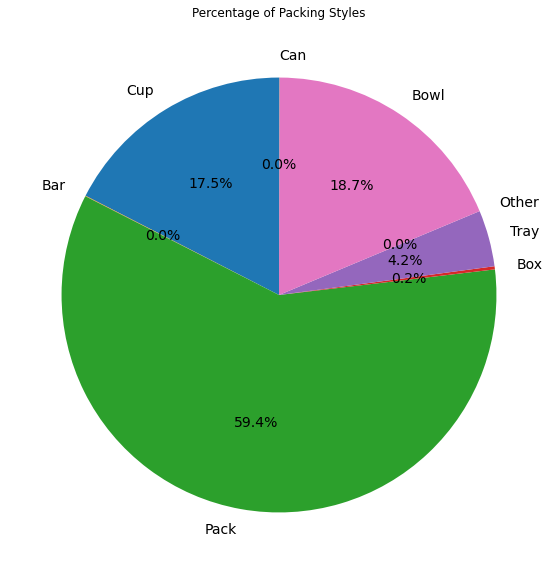

In [12]:
import matplotlib.pyplot as plt

for i in data.Style:
  CountStyles(i)

packing_styles = ['Cup','Bar','Pack','Box','Tray','Other','Bowl','Can']
count = [Cup, Bar, Pack, Box, Tray, Other, Bowl, Can]

fig = plt.figure(figsize=(10,10))
plt.pie(count,labels=packing_styles, startangle=90, autopct='%1.1f%%', textprops={'fontsize':14})
plt.title('Percentage of Packing Styles')
plt.show()

**2. Bar Graph:**

Top 10 Countries with the highest number of Ramen Brands.

In [13]:
# Counter is a function that returns the count of different elements in the given data.
from collections import Counter 

Counter = Counter(data["Country"]) 
most_occur = Counter.most_common(10)
most_occur

[('Japan', 352),
 ('USA', 323),
 ('South Korea', 309),
 ('Taiwan', 223),
 ('Thailand', 191),
 ('China', 168),
 ('Malaysia', 159),
 ('Hong Kong', 137),
 ('Indonesia', 126),
 ('Singapore', 109)]

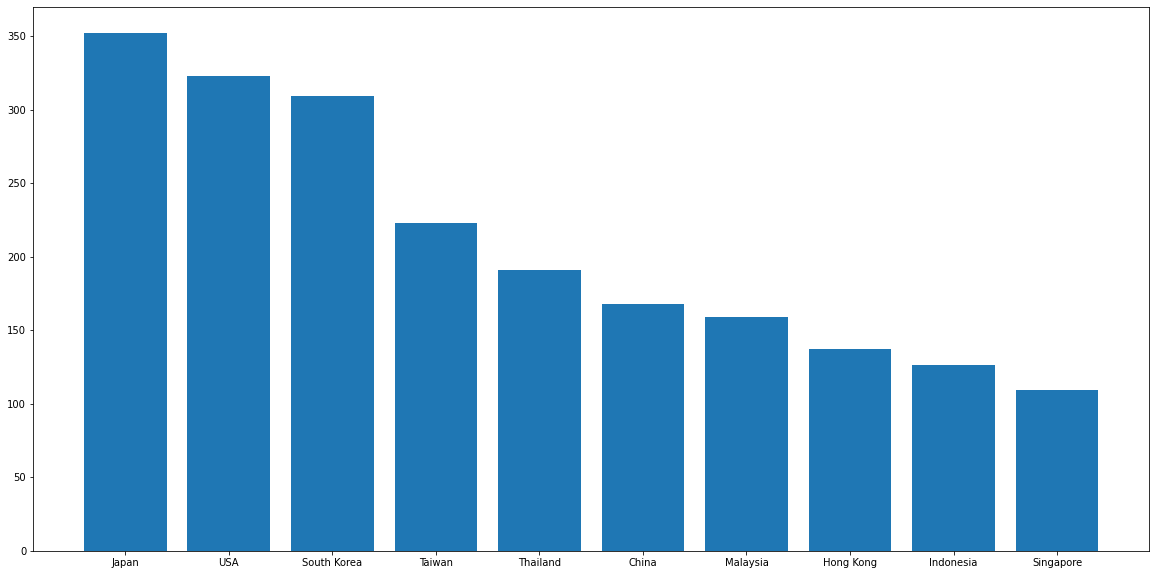

In [14]:
most_occur = dict(most_occur)
plt.x = most_occur.keys()
plt.y = most_occur.values()

plt.figure(figsize=(20,10))
plt.bar(plt.x,plt.y)
plt.show()

**3. Bar Graph:**

Top 5 Countries with highest average Ramen ratings.

In [15]:
avg_ratings = data.groupby('Country')['Stars'].mean()
avg_ratings

Country
Australia               3.138636
Bangladesh              3.714286
Brazil                  4.350000
Cambodia                4.200000
Canada                  2.243902
China                   3.419940
Colombia                3.291667
Estonia                 3.500000
Fiji                    3.875000
Finland                 3.583333
Germany                 3.638889
Ghana                   3.500000
Hong Kong               3.801825
Hungary                 3.611111
India                   3.395161
Indonesia               4.067460
Japan                   3.981605
Malaysia                4.131447
Mexico                  3.730000
Myanmar                 3.946429
Nepal                   3.553571
Netherlands             2.710526
Nigeria                 1.500000
Pakistan                3.000000
Philippines             3.329787
Poland                  3.625000
Singapore               4.126147
South Korea             3.766019
Sweden                  3.250000
Taiwan                  3.668386
Th

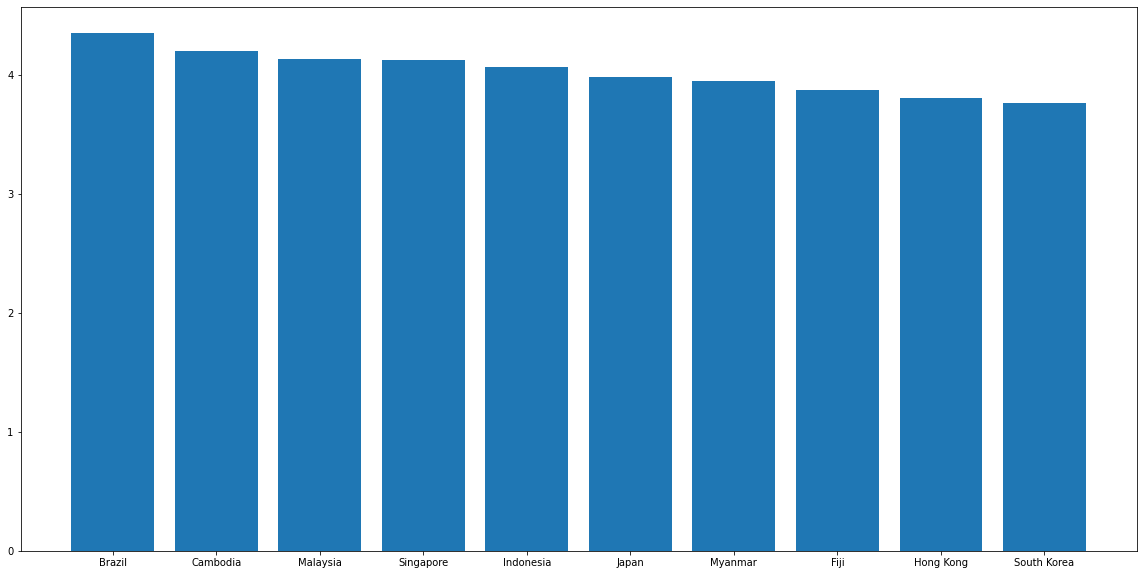

In [16]:
import operator
import itertools

avg_ratings = dict(sorted(avg_ratings.items(), key=operator.itemgetter(1),reverse=True))
avg_ratings = dict(avg_ratings)
avg_ratings = dict(itertools.islice(avg_ratings.items(), 10))
plt.x = avg_ratings.keys()
plt.y = avg_ratings.values()

plt.figure(figsize=(20,10))
plt.bar(plt.x,plt.y)
plt.show()

**Part 6:**
Inferences

From the visualization of the Ramen Ratings Dataset,
we can conclude that:

1.) The most popular type of Packing style of Ramen Noodles is 'Pack'.

2.) Japan has the maximum no. of Ramen Brands in the world followed by USA and South Korea.

3.) Brazil has the highest average Ramen Rating in the world.